In [12]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [14]:
N = 10000
Delta = 0.01
Sigma = 1
Mu = 0.00
Size = 5
P = 0.9
Cor = np.full((Size, Size), P)
for i in range(Size):
    Cor[i, i] = 1

In [15]:
L = linalg.cholesky(Cor, lower = True)

In [16]:
sample = np.random.normal(loc=0, scale=np.sqrt(Delta)*Sigma, size = (N, Size , 1))

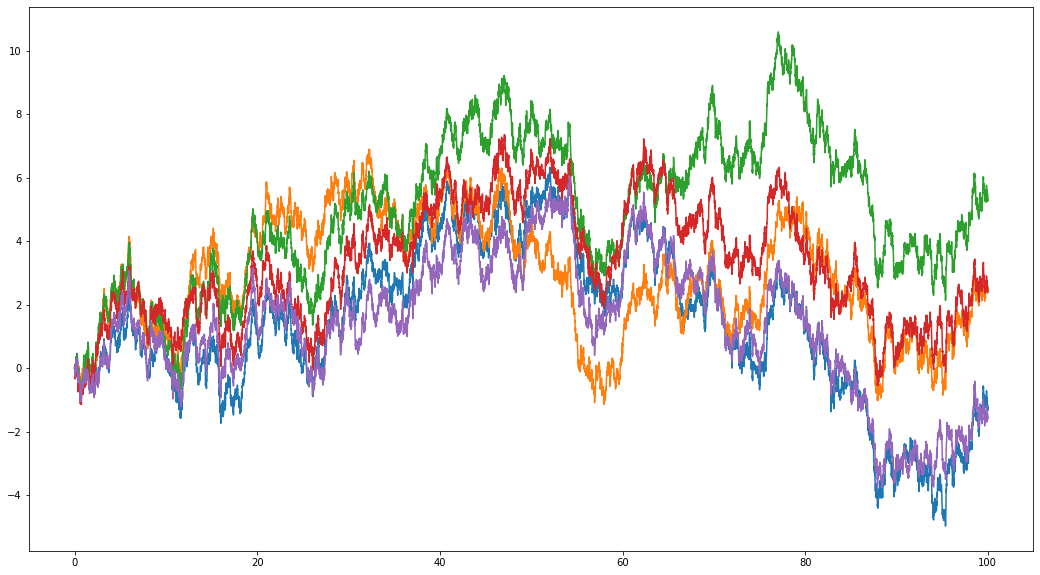

In [17]:
for k in range(N):
    sample[k] = L @ sample[k]
sample[0] = np.full((5,1), 0)
for k in range(1,N):
    for i in range(Size):
        dw = Mu * Delta + sample[k][i][0]
        sample[k][i][0] = dw + sample[k-1][i][0]

t = np.arange(0.0, N*Delta, Delta)
s = np.zeros((Size, N))
plt.figure(figsize = (18,10))
for k in range(Size):
    s[k] = sample[:, k, 0]
    plt.plot(t, s[k])

plt.show()